# Analyze dataset

In [97]:
import os
import glob
import numpy as np
from tqdm.notebook import tqdm

## List all folders

In [2]:
def listFolders(path):
    return [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]

In [3]:
DIR = '/home/AMMOD_data/camera_traps/BayerWald/Vielkadaver-Projekt/'
folders = listFolders(DIR)
folders = sorted(folders)
print(f"{len(folders)} folders: {[name[33:] for name in folders]}")
# np.all([name[:14] == "Spring_Session" for name in folders])

32 folders: ['Beaver_01', 'Marten_01', 'Raccoon_01', 'Reddeer_01', 'Roedeer_01', 'Wildboar_01', 'Badger_02', 'Beaver_02', 'Fox_02', 'Marten_02', 'Raccoon_02', 'Rat_02', 'Reddeer_02', 'Roedeer_02', 'Badger_03', 'Fox_03', 'Raccoon_03', 'Reddeer_03', 'Wildboar_03', 'Badger_04', 'Rat_04', 'Reddeer_04', 'Wildboar_04', 'Badger_05', 'Beaver_05', 'Ermine_05', 'Fox_05', 'Marten_05', 'Raccoon_05', 'Reddeer_05', 'Roedeer_05', 'Wildboar_05']


Check that all directories contain the subfolders "Motion", "Lapse", and "Full".

In [4]:
expectedSubFolders = sorted(["Motion", "Lapse", "Full"])
for folder in folders:
    path = os.path.join(DIR, folder)
    subFolders = listFolders(path)
    assert sorted(subFolders) == expectedSubFolders

## Count samples by folder and subfolder

In [4]:
def listFiles(path):
    return [name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]

def listFilesRecursive(path):
    path = os.path.join(path, "**/*.jpg")
    return [name for name in glob.glob(path, recursive=True) if os.path.isfile(os.path.join(path, name))]

In [75]:
counts = {}
for folder in tqdm(folders):
    counts[folder[33:]] = {}
    counts[folder[33:]]["Total"] = 0
    for subfolder in expectedSubFolders:
        path = os.path.join(DIR, folder, subfolder)
        numFiles = len(listFilesRecursive(path))
        counts[folder[33:]][subfolder] = numFiles
        counts[folder[33:]]["Total"] += numFiles

  0%|          | 0/32 [00:00<?, ?it/s]

In [76]:
counts["Z_Total"] = {}
for subfolder in expectedSubFolders + ["Total"]:
    counts["Z_Total"][subfolder] = 0
    for folder in folders:
        counts["Z_Total"][subfolder] += counts[folder[33:]][subfolder]

In [77]:
np.save("counts.npy", counts)

In [5]:
counts = np.load("counts.npy", allow_pickle=True).tolist()

In [6]:
import pandas as pd

df = pd.DataFrame.from_dict(counts).transpose()

In [7]:
df.sort_index()[["Lapse", "Motion", "Full", "Total"]]

,Lapse,Motion,Full,Total
Badger_02,1728,4715,202,6645
Badger_03,46,4245,67,4358
Badger_04,56,480,192,728
Badger_05,1174,3860,108,5142
Beaver_01,1734,695,200,2629
Beaver_02,1727,2890,270,4887
Beaver_05,1321,2415,32,3768
Ermine_05,867,2380,135,3382
Fox_02,957,1110,200,2267
Fox_03,38,5495,206,5739


<AxesSubplot:>

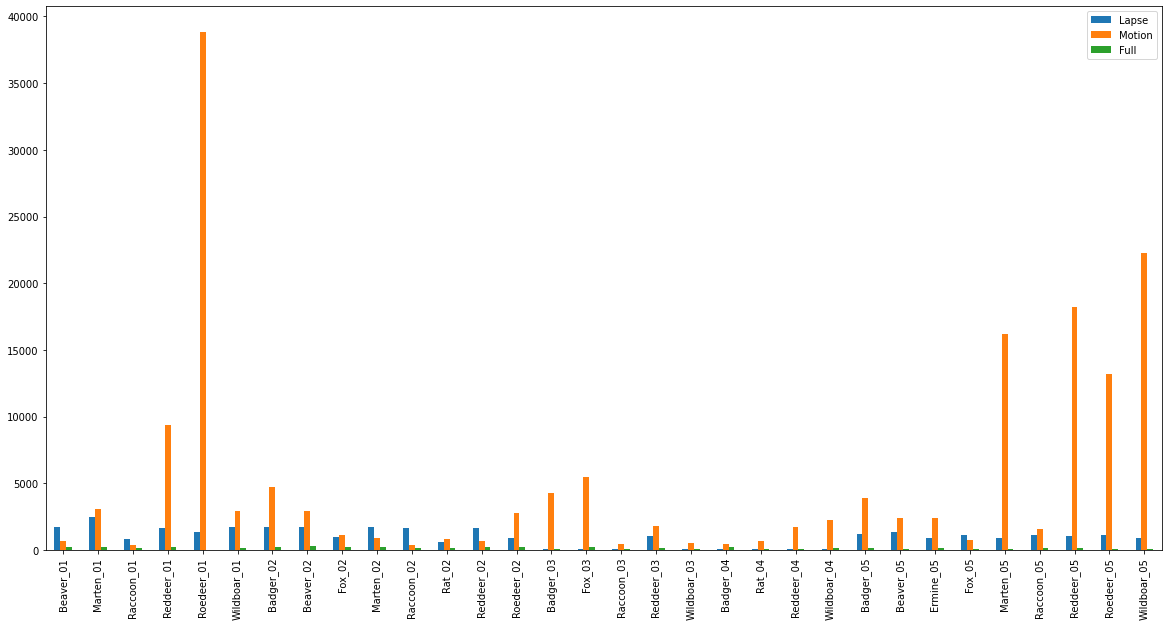

In [8]:
# Plot lapse, motion, full columns without the last row (Z_Total)
df[["Lapse", "Motion", "Full"]].iloc[:-1].plot.bar(figsize=(20, 10), style={"width": 2})

## Verify that 'Full' folder is a subset of 'Motion' folder

In [96]:
for folder in tqdm(folders):
    fullFolder = os.path.join(DIR, folder, "Full")
    motionFolder = os.path.join(DIR, folder, "Motion")
    fullFiles = [os.path.basename(path) for path in listFilesRecursive(fullFolder)]
    motionFiles = [os.path.basename(path) for path in listFilesRecursive(motionFolder)]
    fullFilesFound = 0
    for fullFile in fullFiles:
        if fullFile in motionFiles:
            fullFilesFound += 1
    print(f"{folder}: {fullFilesFound} of {len(fullFiles)} found ({len(fullFiles) - fullFilesFound} not found)")


  0%|          | 0/32 [00:00<?, ?it/s]

VIELAAS_Spring_Session01-VIELAAS_Beaver_01: 200 of 200 found (0 not found)
VIELAAS_Spring_Session01-VIELAAS_Marten_01: 200 of 200 found (0 not found)
VIELAAS_Spring_Session01-VIELAAS_Raccoon_01: 120 of 120 found (0 not found)
VIELAAS_Spring_Session01-VIELAAS_Reddeer_01: 200 of 200 found (0 not found)
VIELAAS_Spring_Session01-VIELAAS_Roedeer_01: 18 of 18 found (0 not found)
VIELAAS_Spring_Session01-VIELAAS_Wildboar_01: 137 of 137 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Badger_02: 202 of 202 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Beaver_02: 270 of 270 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Fox_02: 200 of 200 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Marten_02: 200 of 200 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Raccoon_02: 162 of 162 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Rat_02: 118 of 118 found (0 not found)
VIELAAS_Spring_Session02-VIELAAS_Reddeer_02: 200 of 200 found (0 not found)
VIELAAS_Spring_Session02-V

## Analyze timestamps of images of a single folder (Motion vs Lapse)

In [9]:
demoFolderIndex = 1
demoFolder = os.path.join(DIR, folders[demoFolderIndex])
print(f"Demo folder: {demoFolder}")

Demo folder: /home/AMMOD_data/camera_traps/BayerWald/Vielkadaver-Projekt/VIELAAS_Spring_Session01-VIELAAS_Marten_01


In [98]:
from datetime import datetime
from PIL import Image, ExifTags

def getImageDate(imgPath):
    img = Image.open(imgPath)
    dateRaw = img.getexif()[306]
    return datetime.strptime(dateRaw, "%Y:%m:%d %H:%M:%S")

In [142]:
motionDates = {}
for motionFile in tqdm(listFilesRecursive(os.path.join(demoFolder, "Motion"))):
    motionDates[os.path.basename(motionFile)] = getImageDate(motionFile)

  0%|          | 0/3105 [00:00<?, ?it/s]

In [143]:
np.save(f"motionDates_{demoFolderIndex}.npy", motionDates)

In [17]:
motionDates = np.load(f"motionDates_{demoFolderIndex}.npy", allow_pickle=True).tolist()
# motionDates

In [144]:
lapseDates = {}
for lapseFile in tqdm(listFilesRecursive(os.path.join(demoFolder, "Lapse"))):
    lapseDates[os.path.basename(lapseFile)] = getImageDate(lapseFile)

  0%|          | 0/2462 [00:00<?, ?it/s]

In [145]:
np.save(f"lapseDates_{demoFolderIndex}.npy", lapseDates)

In [15]:
lapseDates = np.load(f"lapseDates_{demoFolderIndex}.npy", allow_pickle=True).tolist()
# lapseDates

In [27]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

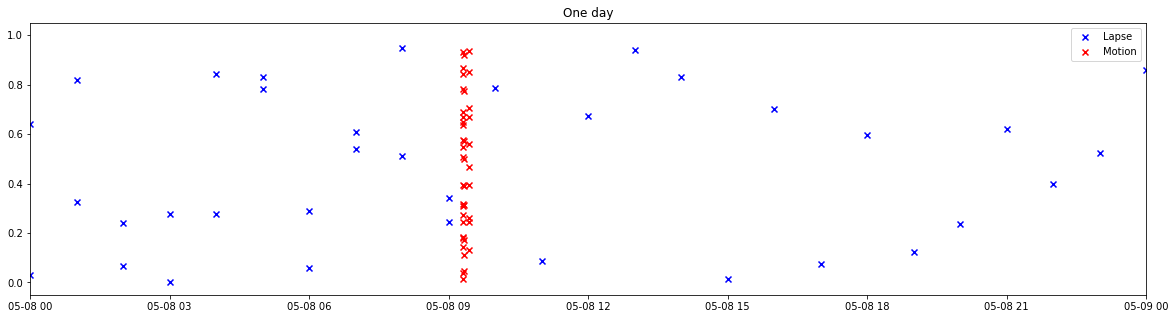

In [19]:
plt.figure(figsize=(20, 5))
plt.title("One day")
plt.scatter(lapseDates.values(), np.random.rand(len(lapseDates)), marker="x", color="blue", label="Lapse")
plt.scatter(motionDates.values(), np.random.rand(len(motionDates)), marker="x", color="red", label="Motion")
plt.xlim(datetime(2021, 5, 8), datetime(2021, 5, 9))
plt.legend()
plt.show()

## Map lapse date to file names

In [20]:
lapseFiles = {}
for file, date in lapseDates.items():
    if date in lapseFiles:
        lapseFiles[date].append(file)
    else:
        lapseFiles[date] = [file]

In [26]:
lapseFiles

{datetime.datetime(2021, 4, 25, 11, 0): ['2021_04_25_11h_1361.jpg',
  '2021_04_25_11h_74.jpg'],
 datetime.datetime(2021, 5, 25, 13, 0): ['2021_05_25_13h_623.jpg'],
 datetime.datetime(2021, 4, 27, 15, 0): ['2021_04_27_15h_125.jpg',
  '2021_04_27_15h_2488.jpg'],
 datetime.datetime(2021, 6, 27, 6, 0): ['2021_06_27_06h_5484.jpg'],
 datetime.datetime(2021, 6, 21, 12, 0): ['2021_06_21_12h_5272.jpg',
  '2021_06_21_12h_5029.jpg'],
 datetime.datetime(2021, 5, 20, 21, 0): ['2021_05_20_21h_3914.jpg',
  '2021_05_20_21h_511.jpg'],
 datetime.datetime(2021, 5, 23, 0, 0): ['2021_05_23_00h_3965.jpg',
  '2021_05_23_00h_562.jpg'],
 datetime.datetime(2021, 5, 21, 2, 0): ['2021_05_21_02h_3919.jpg',
  '2021_05_21_02h_516.jpg'],
 datetime.datetime(2021, 7, 2, 8, 0): ['2021_07_02_08h_5616.jpg'],
 datetime.datetime(2021, 5, 6, 6, 0): ['2021_05_06_06h_3400.jpg',
  '2021_05_06_06h_331.jpg'],
 datetime.datetime(2021, 4, 30, 3, 0): ['2021_04_30_03h_2883.jpg',
  '2021_04_30_03h_185.jpg'],
 datetime.datetime(2021, 6

In [80]:
from IPython.core.display import display
import ipywidgets as widgets
import subprocess

In [84]:
def displayLapseImagesForDate(date, demoFolder):
    imgNames = lapseFiles.get(date, [])
    imgWidgets = []
    for i, imgName in enumerate(imgNames):
        print(f"#{i+1} Lapse/{imgName}")
        fullPath = os.path.join(demoFolder, "Lapse", imgName)
        # display(HTML(f"<a href=\"{fullPath}\">{imgName}</a>"))
        with open(fullPath, "rb") as f:
            imgWidgets.append(widgets.Image(value=f.read(), width=600))
    display(widgets.HBox(imgWidgets))

In [85]:
def openImagesForDate(date, demoFolder):
    imgNames = lapseFiles.get(date, [])
    for i, imgName in enumerate(imgNames):
        print(f"#{i+1} Lapse/{imgName}")
        fullPath = os.path.join(demoFolder, "Lapse", imgName)
        subprocess.call(("xdg-open", fullPath))

In [86]:
displayLapseImagesForDate(datetime(2021, 4, 25, 11, 0), demoFolder)

#1 Lapse/2021_04_25_11h_1361.jpg
#2 Lapse/2021_04_25_11h_74.jpg


In [89]:
openImagesForDate(datetime(2021, 5, 23, 19, 0), demoFolder)

#1 Lapse/2021_05_23_19h_581.jpg
#2 Lapse/2021_05_23_19h_4029.jpg


**Observation:** All images for the same datatime are exact duplicates.

In [92]:
len(lapseFiles)

1733

In [93]:
totalDuplicates = 0
for imgList in lapseFiles.values():
    if len(imgList) > 1:
        totalDuplicates += 1
        if len(imgList) > 2:
            print("length of", len(imgList))
print("Duplicate ratio:", totalDuplicates / len(lapseFiles))

Duplicate ratio: 0.42065781881130987


42 % of lapse times (in this folder) have duplicate images. No lapse time has more than two images.

In [94]:
motionDates

{'Marten_01_00383.jpg': datetime.datetime(2021, 4, 24, 14, 21, 38),
 'Marten_01_02983.jpg': datetime.datetime(2021, 6, 21, 12, 52, 56),
 'Marten_01_01030.jpg': datetime.datetime(2021, 4, 26, 14, 42, 54),
 'Marten_01_01087.jpg': datetime.datetime(2021, 4, 26, 14, 53, 34),
 'Marten_01_01607.jpg': datetime.datetime(2021, 4, 28, 8, 4, 48),
 'Marten_01_00772.jpg': datetime.datetime(2021, 4, 26, 13, 23, 47),
 'Marten_01_00035.jpg': datetime.datetime(2021, 4, 22, 14, 44, 57),
 'Marten_01_03092.jpg': datetime.datetime(2021, 7, 3, 16, 29, 44),
 'Marten_01_00794.jpg': datetime.datetime(2021, 4, 26, 13, 39, 29),
 'Marten_01_00827.jpg': datetime.datetime(2021, 4, 26, 13, 47, 36),
 'Marten_01_02156.jpg': datetime.datetime(2021, 4, 30, 14, 16, 2),
 'Marten_01_01500.jpg': datetime.datetime(2021, 4, 27, 14, 44, 50),
 'Marten_01_00349.jpg': datetime.datetime(2021, 4, 24, 14, 12, 28),
 'Marten_01_02105.jpg': datetime.datetime(2021, 4, 30, 13, 40, 32),
 'Marten_01_00054.jpg': datetime.datetime(2021, 4, 2

In [113]:
from datetime import datetime, timedelta

# get filenames of closest dates from map
def getClosestLapseImages(motionImgName, folder):
    fullPath = os.path.join(folder, "Motion", motionImgName)
    date = getImageDate(fullPath)
    # ignore minutes, seconds
    previousDate = date.replace(minute=0, second=0)
    nextDate = previousDate + timedelta(hours=1)
    while not previousDate in lapseFiles:
        previousDate -= timedelta(hours=1)
    while not nextDate in lapseFiles:
        nextDate -= timedelta(hours=1)
    return lapseFiles[previousDate][0], lapseFiles[nextDate][0]

In [175]:
def displayImages(images, titles, colorbar=False, size=8, **imshowargs):
    numImgs = len(images)
    plt.figure(figsize=(numImgs * size, size))
    for i, image, title in zip(range(numImgs), images, titles):
        plt.subplot(1, numImgs, i + 1)
        plt.imshow(image, **imshowargs)
        plt.title(title)
        if colorbar:
            plt.colorbar()
    plt.tight_layout()
    plt.show()

In [168]:
def readImages(imgNames, baseFolder, subFolders):
    assert len(imgNames) == len(subFolders)
    # cut off header and footer bars
    return [mpimg.imread(os.path.join(baseFolder, subFolder, imgName))[40:-40,:] for imgName, subFolder in zip(imgNames, subFolders)]

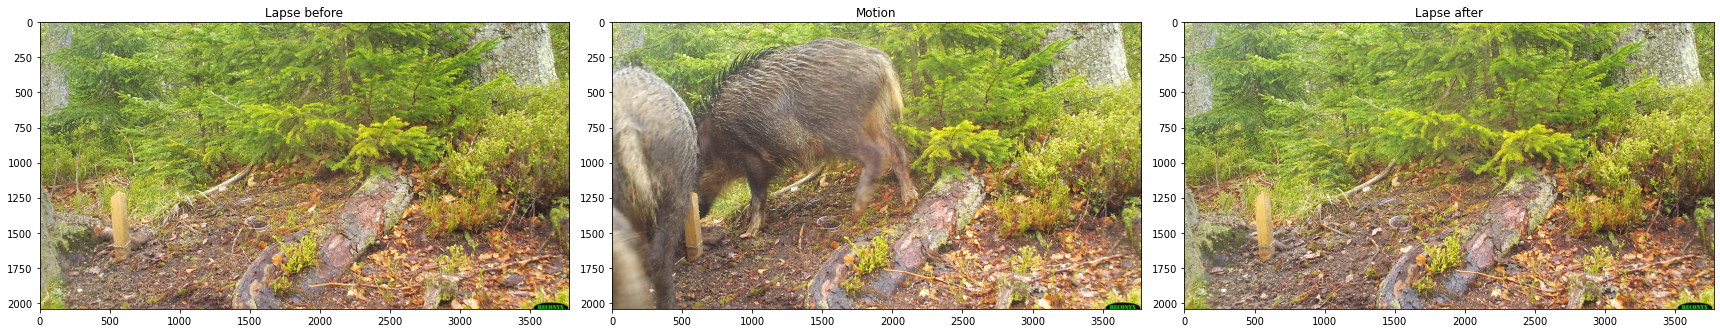

In [167]:
motionImg = "Marten_01_02517.jpg"
imgBefore, imgAfter = getClosestLapseImages(motionImg, demoFolder)
imgs = readImages([imgBefore, motionImg, imgAfter], demoFolder, ["Lapse", "Motion", "Lapse"])
displayImages(imgs, ["Lapse before", "Motion", "Lapse after"])

In [169]:
def toGrayscale(img):
    if len(img.shape) == 3:
        return np.average(img, -1) # average over last axis
    else:
        return img
def threshold(img, thr):
    return img * (img >= thr)

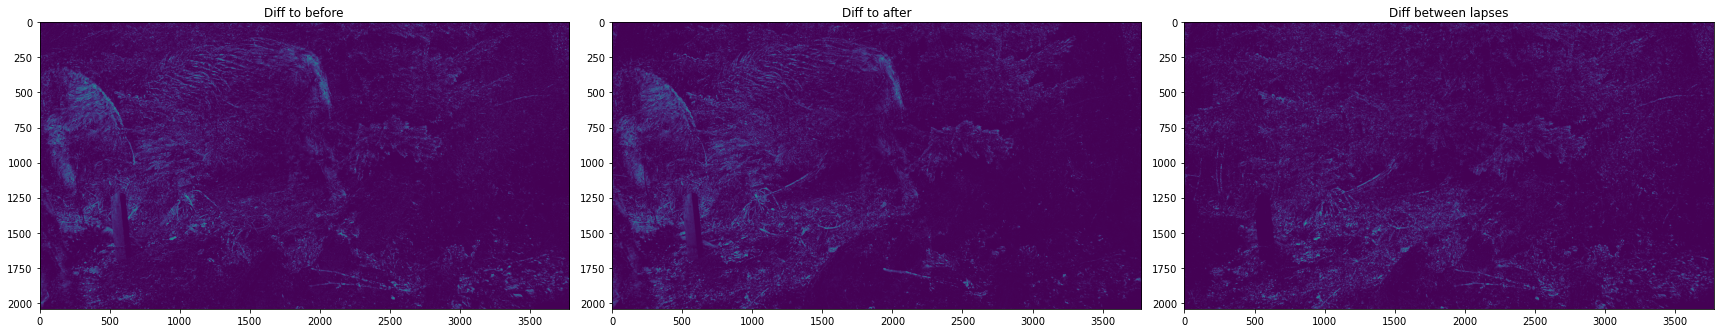

In [170]:
gImgs = [toGrayscale(img) for img in imgs]

diffToBefore = (gImgs[1] - gImgs[0]) ** 2
diffToAfter = (gImgs[1] - gImgs[2]) ** 2
diffLapses = (gImgs[2] - gImgs[0]) ** 2
displayImages([diffToBefore, diffToAfter, diffLapses], ["Diff to before", "Diff to after", "Diff between lapses"])

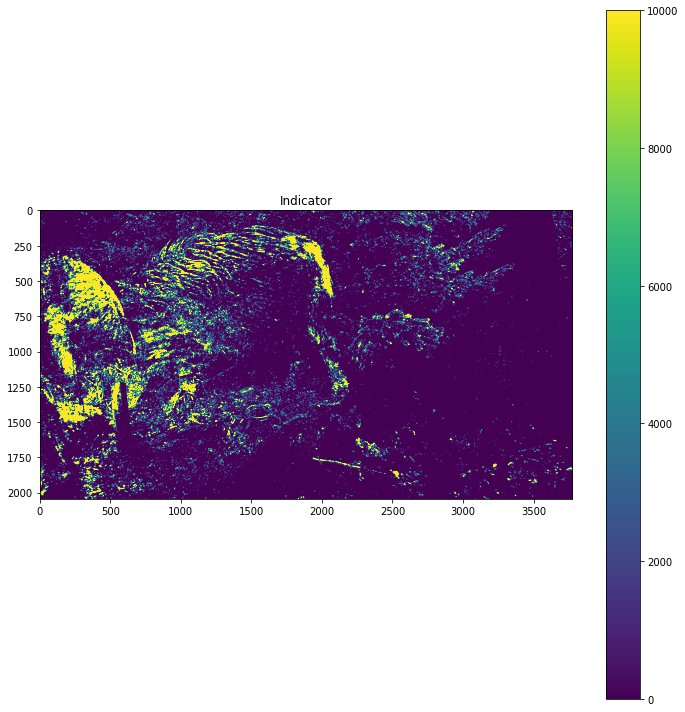

In [187]:
indicator = threshold(diffToBefore + diffToAfter - 2 * diffLapses, 10000)
displayImages([indicator], ["Indicator"], colorbar=True, size=10, vmax=10000)

942